In [382]:
# 필요한 라이브러리 설치
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
import requests
import scipy.stats as stats
from matplotlib import font_manager
from geopy.geocoders import Nominatim
from geopy import distance
import folium
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

!pip install -q googlemaps
import googlemaps

# 나눔고딕 폰트 다운로드
url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
response = requests.get(url)

# 다운로드한 폰트를 파일로 저장
with open("NanumGothic.ttf", "wb") as f:
    f.write(response.content)

# 폰트 설치
font_manager.fontManager.addfont('NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

DEPRECATION: Loading egg at c:\users\ssw\anaconda3\lib\site-packages\argparse-1.4.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\ssw\anaconda3\lib\site-packages\h5py-3.10.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\ssw\anaconda3\lib\site-packages\py_hanspell-1.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [633]:
# 데이터(데이터프레임) 읽어오기
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape', sep=',')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [639]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [67]:
# 상품 카테고리 재분류 결과 병합
categories = pd.read_csv('Product_categories_ver2.csv', encoding='utf-8', sep='\t')
categories.head()

,Product Name,Category Name
0,adidas Brazuca 2014 Official Match Ball,Sports Equipment
1,adidas Kids' F5 Messi FG Soccer Cleat,Sports Equipment
2,adidas Men's F10 Messi TRX FG Soccer Cleat,Sports Equipment
3,adidas Men's Germany Black Crest Away Tee,Sports Equipment
4,adidas Youth Germany Black/Red Away Match Soc,Sports Equipment


In [68]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   118 non-null    object
 1   Category Name  118 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [69]:
# 필요없는 컬럼 제거 후 데이터 재확인
data.drop(columns=['Customer Email', 
                   'Customer Password', 
                   'Customer Fname', 
                   'Customer Lname', 
                   'Product Description', 
                   'Product Image', 
                   'Product Status',
                   'Order Item Cardprod Id'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [70]:
# order date와 shipping date의 dtype을 datetime으로 변경
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [71]:
# 타입이 정상적으로 변환되었는지 head()로 데이터 확인
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class


In [72]:
data.describe(include='all').round(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
count,180519,180519.000,180519.000,180519.000,180519.000,180519,180519.000,180519.000,180519,180519,180519,180519.000,180519,180519,180519,180516.000,180519.000,180519,180519.000,180519.000,180519,180519,180519,180519.000,180519,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519,180519,180519,24840.000,180519.000,180519.000,180519,180519.000,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,2,NaN,3,46,7458,NaN,NaN,11,NaN,NaN,5,3597,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1089,9,NaN,NaN,NaN,118,NaN,NaN,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,EE. UU.,NaN,Consumer,PR,9126 Wishing Expressway,NaN,NaN,Fan Shop,NaN,NaN,LATAM,Santo Domingo,Estados Unidos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central America,Inglaterra,COMPLETE,NaN,NaN,NaN,Perfect Fitness Perfect Rip Deck,NaN,NaN,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,111146,NaN,93504,69373,122,NaN,NaN,66861,NaN,NaN,51594,2211,24840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28341,6722,59491,NaN,NaN,NaN,24515,NaN,NaN,107752
mean,NaN,3.498,2.932,21.975,183.108,NaN,0.548,31.851,NaN,NaN,NaN,6691.379,NaN,NaN,NaN,35921.127,5.443,NaN,29.720,-84.916,NaN,NaN,NaN,6691.379,2016-06-12 17:47:04.669868544,36221.895,20.665,0.102,90260.000,141.233,0.121,2.128,203.772,183.108,21.975,NaN,NaN,NaN,55426.132,692.510,31.851,NaN,141.233,2016-06-16 05:45:23.202433024,NaN
min,NaN,0.000,0.000,-4274.980,7.490,NaN,0.000,2.000,NaN,NaN,NaN,1.000,NaN,NaN,NaN,603.000,2.000,NaN,-33.938,-158.026,NaN,NaN,NaN,1.000,2015-01-01 00:00:00,1.000,0.000,0.000,1.000,9.990,-2.750,1.000,9.990,7.490,-4274.980,NaN,NaN,NaN,1040.000,19.000,2.000,NaN,9.990,2015-01-03 00:00:00,NaN
25%,NaN,2.000,2.000,7.000,104.380,NaN,0.000,18.000,NaN,NaN,NaN,3258.500,NaN,NaN,NaN,725.000,4.000,NaN,18.265,-98.446,NaN,NaN,NaN,3258.500,2015-09-21 13:49:00,18057.000,5.400,0.040,45130.500,50.000,0.080,1.000,119.980,104.380,7.000,NaN,NaN,NaN,23464.000,403.000,18.000,NaN,50.000,2015-09-25 06:59:00,NaN
50%,NaN,3.000,4.000,31.520,163.990,NaN,1.000,29.000,NaN,NaN,NaN,6457.000,NaN,NaN,NaN,19380.000,5.000,NaN,33.145,-76.848,NaN,NaN,NaN,6457.000,2016-06-11 13:06:00,36140.000,14.000,0.100,90260.000,59.990,0.270,1.000,199.920,163.990,31.520,NaN,NaN,NaN,59405.000,627.000,29.000,NaN,59.990,2016-06-15 08:32:00,NaN
75%,NaN,5.000,4.000,64.800,247.400,NaN,1.000,45.000,NaN,NaN,NaN,9779.000,NaN,NaN,NaN,78207.000,7.000,NaN,39.280,-66.371,NaN,NaN,NaN,9779.000,2017-03-01 08:42:00,54144.000,29.990,0.160,135389.500,199.990,0.360,3.000,299.950,247.400,64.800,NaN,NaN,NaN,90008.000,1004.000,45.000,NaN,199.990,2017-03-04 21:29:00,NaN
max,NaN,6.000,4.000,911.800,1939.990,NaN,1.000,76.000,NaN,NaN,NaN,20757.000,NaN,NaN,NaN,99205.000,12.000,NaN,48.782,115.263,NaN,NaN,NaN,20757.000,2018-01-31 23:38:00,77204.000,500.000,0.250,180519.000,1999.990,0.500,5.000,1999.990,1939.990,911.800,NaN,NaN,NaN,99301.000,1363.000,76.000,NaN,1999.990,2018-02-06 22:14:00,NaN


In [73]:
# 상품 카테고리별 count 확인
data['Category Name'].value_counts()

Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              

In [74]:
# 상품 카테고리가 부적절하여 재분류 필요하므로 재분류 결과를 병합
categories = pd.read_csv('Product_categories_ver2.csv', encoding='utf-8', sep='\t')
categories.sort_values(by=['Category Name'], axis=0)

,Product Name,Category Name
44,Hirzl Women's Hybrid Golf Glove,Apparel
38,Glove It Women's Imperial Golf Glove,Apparel
39,Glove It Women's Mod Oval 3-Zip Carry All Gol,Apparel
40,Glove It Women's Mod Oval Golf Glove,Apparel
43,Hirzl Men's Hybrid Golf Glove,Apparel
45,Hirzl Women's Soffft Flex Golf Glove,Apparel
49,LIJA Women's Argyle Golf Polo,Apparel
50,LIJA Women's Button Golf Dress,Apparel
51,LIJA Women's Eyelet Sleeveless Golf Polo,Apparel
52,LIJA Women's Mid-Length Panel Golf Shorts,Apparel


In [75]:
categories['Category Name'].value_counts()

Category Name
Sports Equipment            42
Apparel                     41
Electronics                 13
Miscellaneous                4
Fitness Equipment            4
Music and Media              4
Home Goods                   4
Outdoor and Camping Gear     4
Toys and Games               2
Name: count, dtype: int64

In [76]:
# merge로 병합, 기존 컬럼은 '_old'로 재명명하고 병합 결과 확인
data_rev1 = data.merge(right=categories, how='left', on='Product Name', suffixes=('_old', ''))
data_rev1[['Category Name', 'Product Name']].value_counts(sort=False)

Category Name             Product Name                                 
Apparel                   Baby sweater                                       207
                          Columbia Men's PFG Anchor Tough T-Shirt            304
                          Glove It Imperial Golf Towel                       302
                          Glove It Urban Brick Golf Towel                    300
                          Glove It Women's Imperial Golf Glove               307
                          Glove It Women's Mod Oval 3-Zip Carry All Gol      295
                          Glove It Women's Mod Oval Golf Glove               277
                          Hirzl Men's Hybrid Golf Glove                      282
                          Hirzl Women's Hybrid Golf Glove                    311
                          Hirzl Women's Soffft Flex Golf Glove               298
                          LIJA Women's Argyle Golf Polo                       66
                          LIJA Women'

In [77]:
# 기존 컬럼 삭제하고 상품 카테고리 재분류 결과 병합 최종 확인
data_rev1.drop(columns=['Category Name_old'], inplace=True)
data=data_rev1
data[['Category Name', 'Product Name']].value_counts(sort=False)

Category Name             Product Name                                 
Apparel                   Baby sweater                                       207
                          Columbia Men's PFG Anchor Tough T-Shirt            304
                          Glove It Imperial Golf Towel                       302
                          Glove It Urban Brick Golf Towel                    300
                          Glove It Women's Imperial Golf Glove               307
                          Glove It Women's Mod Oval 3-Zip Carry All Gol      295
                          Glove It Women's Mod Oval Golf Glove               277
                          Hirzl Men's Hybrid Golf Glove                      282
                          Hirzl Women's Hybrid Golf Glove                    311
                          Hirzl Women's Soffft Flex Golf Glove               298
                          LIJA Women's Argyle Golf Polo                       66
                          LIJA Women'

In [881]:
# 잘못된 값이 들어간 컬럼 식별 후 클리닝
data.at[35704, 'Customer City'] = 'Elk Grove'
data.at[35704, 'Customer State'] = 'CA'
data.at[35704, 'Customer Zipcode'] = 95758
data.at[35704, 'Customer Street'] = None

data.at[46440, 'Customer City'] = 'Elk Grove'
data.at[46440, 'Customer State'] = 'CA'
data.at[46440, 'Customer Zipcode'] = 95758
data.at[46440, 'Customer Street'] = None

data.at[82511, 'Customer City'] = 'El Monte'
data.at[82511, 'Customer State'] = 'CA'
data.at[82511, 'Customer Zipcode'] = 91732
data.at[82511, 'Customer Street'] = None

data.loc[82511]

Type                                                          DEBIT
Days for shipping (real)                                          4
Days for shipment (scheduled)                                     4
Benefit per order                                         59.990002
Sales per customer                                       299.959992
Delivery Status                                    Shipping on time
Late_delivery_risk                                                0
Category Id                                                      63
Customer City                                              El Monte
Customer Country                                            EE. UU.
Customer Id                                                   14046
Customer Segment                                           Consumer
Customer State                                                   CA
Customer Street                                                None
Customer Zipcode                                

<Figure size 1800x600 with 0 Axes>

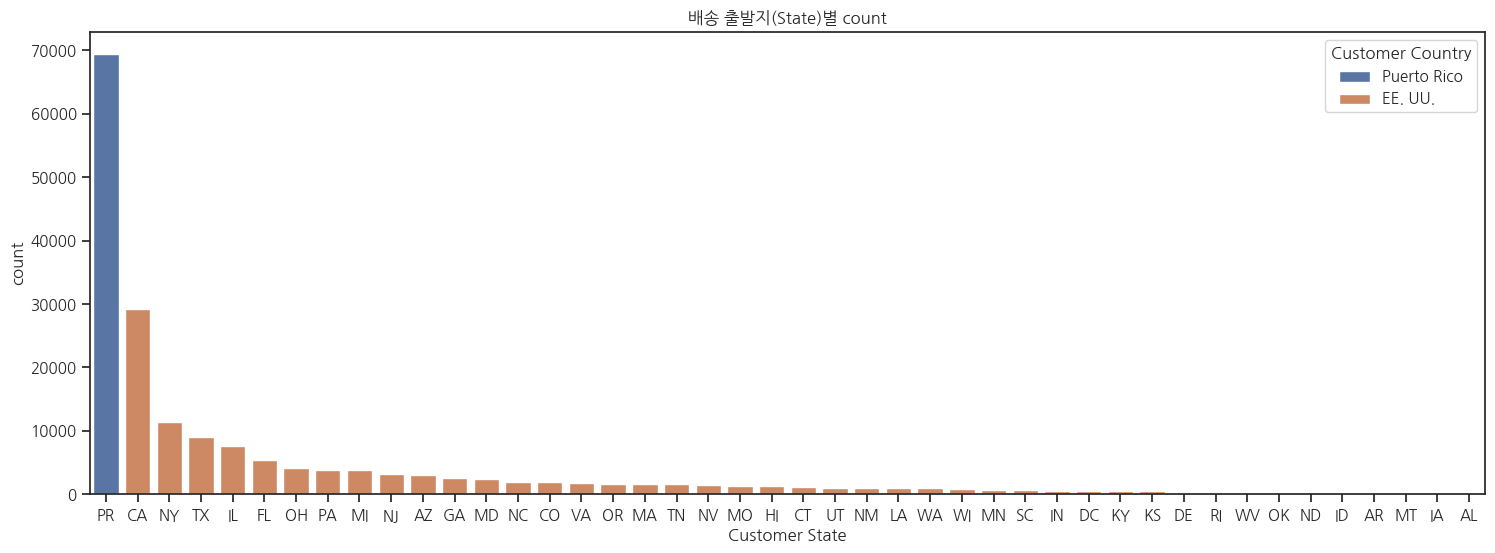

In [925]:
# 배송 출발지(State)별 집계
state_agg = pd.DataFrame(data.groupby(by='Customer Country', sort=False)['Customer State'].value_counts())

plt.figure(figsize=(18, 6))
sns.barplot(x='Customer State', y = 'count', hue='Customer Country', data=state_agg)
plt.title('배송 출발지(State)별 count')
plt.xticks(rotation=0)

plt.show()

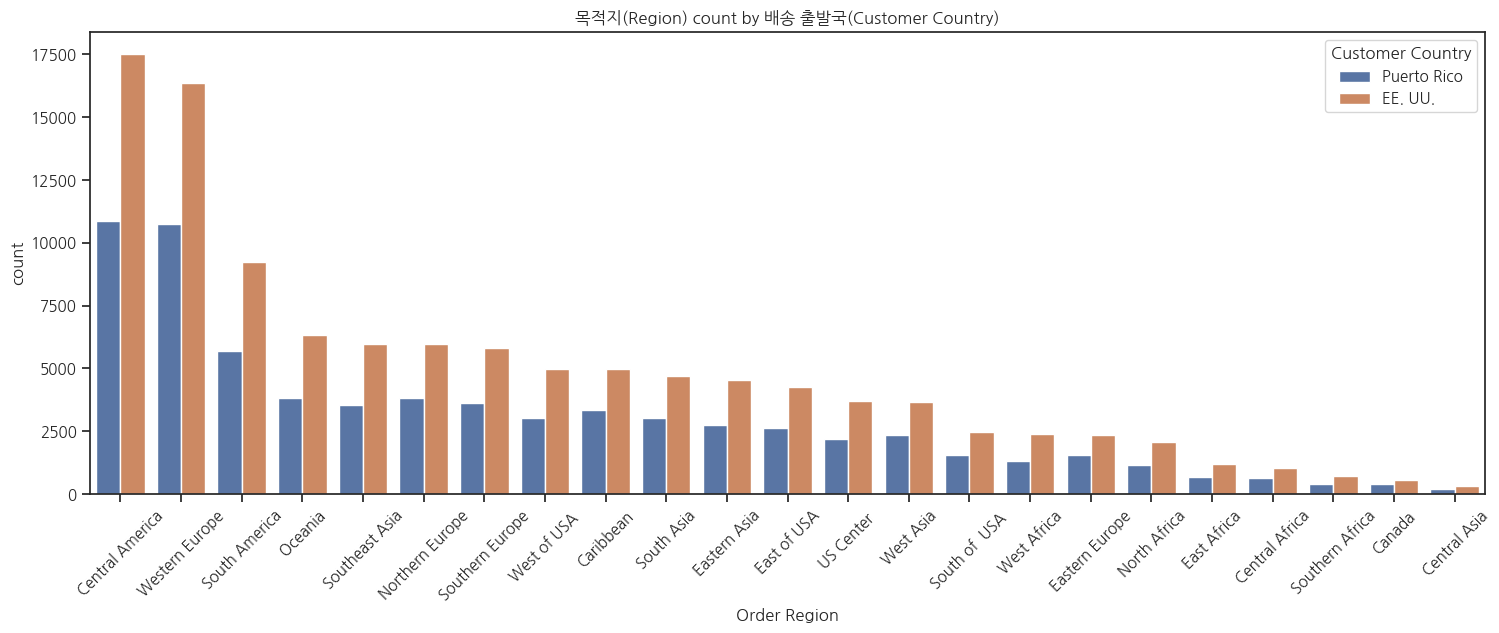

In [959]:
# 배송 목적지(Region)별 집계
region_agg = pd.DataFrame(data.groupby(by='Customer Country', sort=True)['Order Region'].value_counts())

plt.figure(figsize=(18, 6))
sns.barplot(x='Order Region', y = 'count', hue='Customer Country', data=region_agg, hue_order=['Puerto Rico', 'EE. UU.'])
plt.title('목적지(Region) count by 배송 출발국(Customer Country)')
plt.xticks(rotation=45)

plt.show()

C:\Users\SSW\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.

C:\Users\SSW\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.



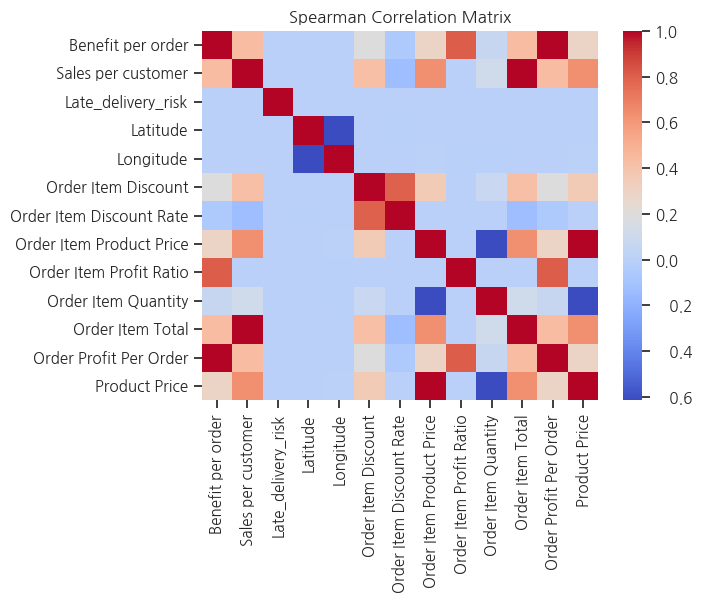

In [78]:
# 배송 지연 요인 식별을 위해 상관관계 분석(순서형 변수가 포함되어 있으므로 spearman 상관계수로)
# 수치형 변수중에서도 단순 Id나 zip코드는 제외
corr_matrix = data[['Benefit per order', 
                    'Sales per customer',
                    'Late_delivery_risk',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']].corr(method='spearman')
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Late_delivery_risk와 다른 변수와는 별다른 spearman 상관관계가 나타나지 않음.
point biserial(이분형-연속형)로 계산하면 다를 수도 있으니 AI의 도움을 받아 계산해봤음.

In [80]:
# Late_delivery_risk와 다른 수치형 변수 간의 point biserial 상관 계수 계산
# 수치형 변수중에서도 단순 Id나 zip코드는 제외
def calculate_point_biserial_correlation(data: pd.DataFrame, target_column: str, corr_list: list) -> dict:
    """
    이진 타겟 변수와 연속 변수 목록 간의 포인트 바이세리얼 상관관계를 계산합니다.
    
    Args:
    data (pd.DataFrame): 입력 데이터프레임.
    target_column (str): 이진 타겟 열의 이름.
    corr_list (list): 타겟 변수와 상관관계를 계산할 연속 변수 이름 목록.
    
    Returns:
    dict: 변수 이름을 키로 하고 해당 상관관계 값을 값으로 가지는 딕셔너리.
    """
    correlation_results = {}
    for i in corr_list:
        correlation, _ = stats.pointbiserialr(data[target_column].astype('bool'), data[i])
        correlation_results[i] = correlation
    return correlation_results

corr_list=['Benefit per order', 
                    'Sales per customer',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']
correlation_results = calculate_point_biserial_correlation(data, 'Late_delivery_risk', corr_list)
pd.Series(correlation_results)

Benefit per order          -0.003727
Sales per customer         -0.003791
Latitude                    0.000679
Longitude                  -0.001915
Order Item Discount        -0.000750
Order Item Discount Rate    0.000404
Order Item Product Price   -0.002175
Order Item Profit Ratio    -0.002316
Order Item Quantity        -0.000139
Order Item Total           -0.003791
Order Profit Per Order     -0.003727
Product Price              -0.002175
dtype: float64

point biserial로 계산해도 유의미한 결과는 나오지 않음.
그렇다면 배송 지연일은 어떨까? Late_delivery_risk를 빼고 배송지연일을 넣어서 pearson 상관계수로 재산출하였음.

In [82]:
# 배송 지연 요인 식별을 위해 상관관계 분석
# 수치형 변수중에서도 단순 Id나 zip코드는 제외
corr_matrix = data[['Benefit per order', 
                    'Sales per customer',
                    'Late_delivery_risk',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']].corr(method='spearman')

C:\Users\SSW\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.

C:\Users\SSW\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.



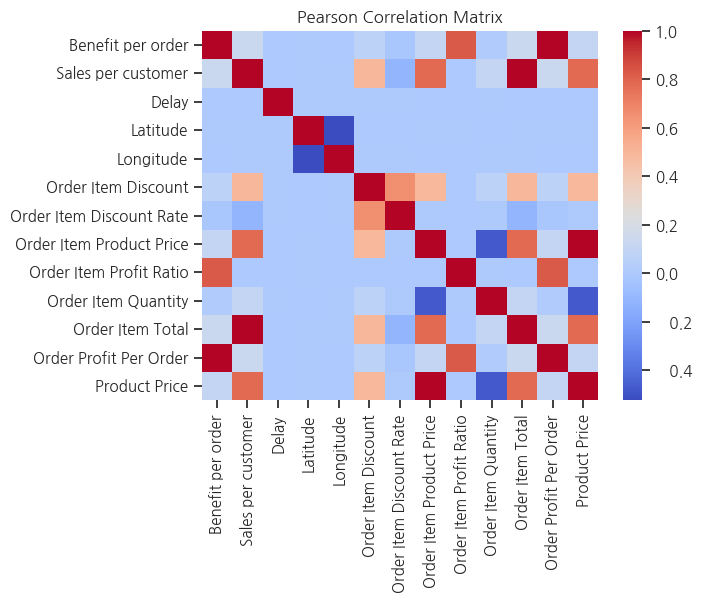

In [83]:
#'Days for shipping (real)과 Days for shipment (scheduled) 차이를 계산하여 배송 지연일 계산
data['Delay'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

corr_matrix = data[['Benefit per order', 
                    'Sales per customer',
                    'Delay',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']].corr(method='pearson')
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

배송지연일로 계산해도 역시 별다른 차이가 나타나지 않음.
대부분의 수치형 변수가 가격이나 이윤과 연관되어 있는데,
그렇다면 배송거리나 제품 카테고리, 지역, 배송 유형 등의 다른 변수에서 배송 지연요인을 식별해야 함
(배송거리는 별도의 작업을 필요로 하므로 추후에 geopy 등을 통해 산출하여 살펴보기로 함)

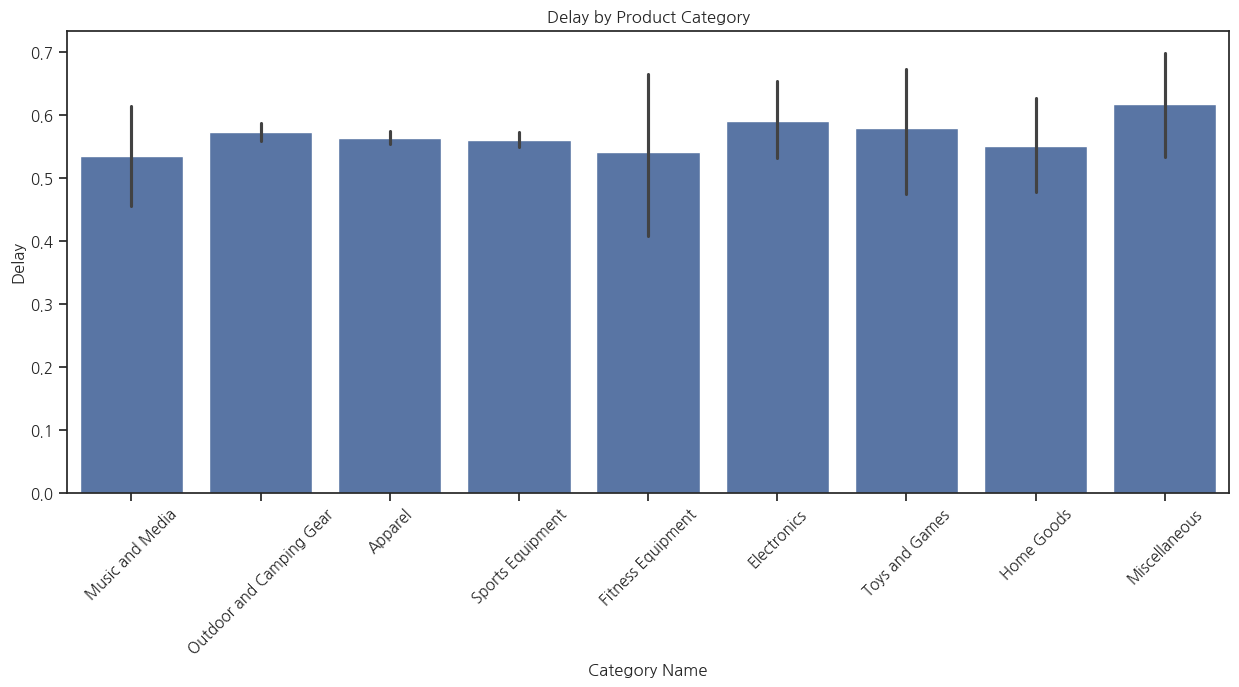

In [85]:
# 제품 카테고리별 배송 지연일 평균
plt.figure(figsize=(15, 6))
sns.barplot(x='Category Name', y='Delay', data=data)
plt.title('Delay by Product Category')
plt.xticks(rotation=45)

plt.show()

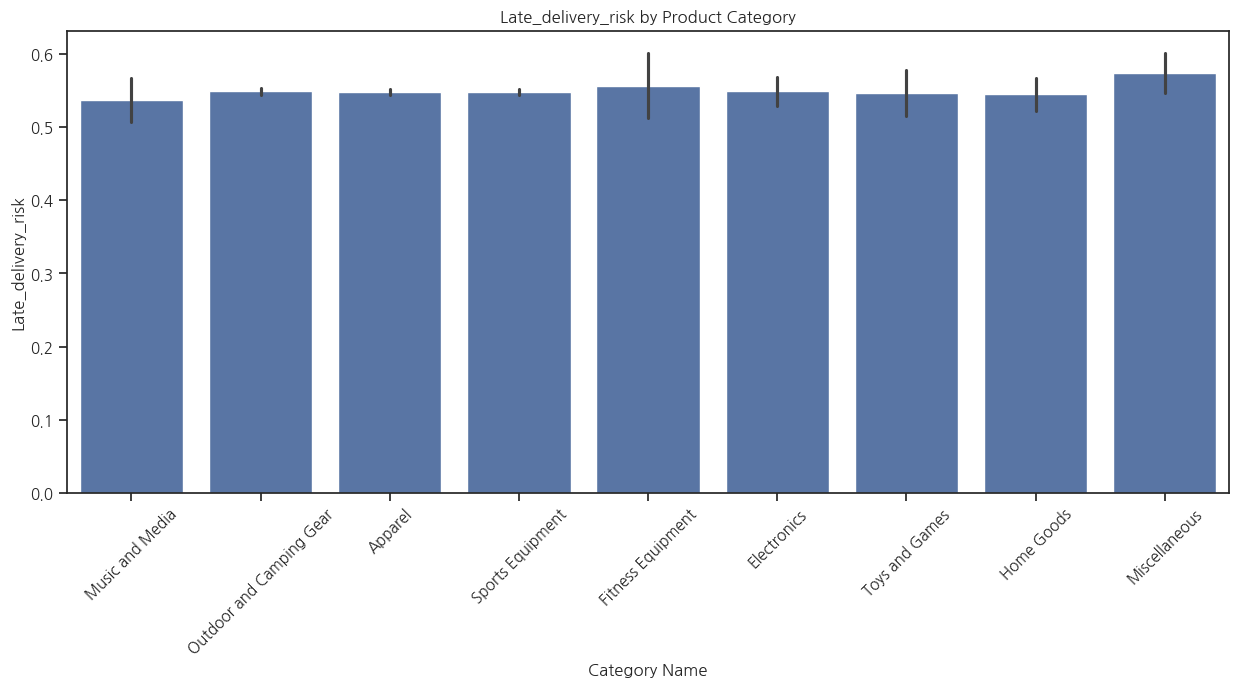

In [86]:
# 제품 카테고리별 배송 지연 비율(0에서 1)
plt.figure(figsize=(15, 6))
sns.barplot(x='Category Name', y='Late_delivery_risk', data=data)
plt.title('Late_delivery_risk by Product Category')
plt.xticks(rotation=45)

plt.show()

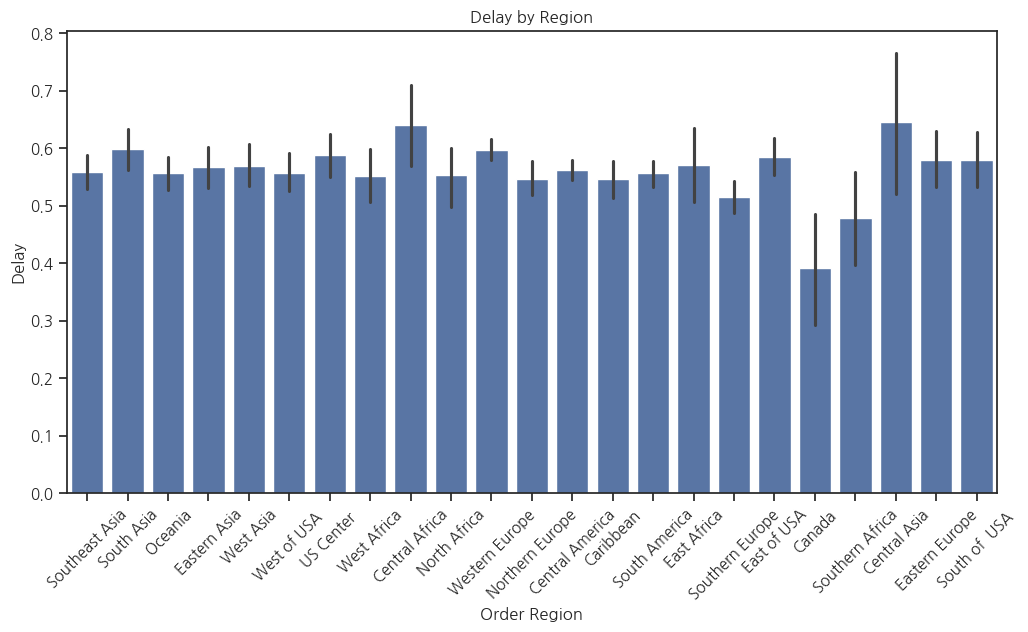

In [87]:
# 주문 지역별 배송 지연일 평균
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Region', y='Delay', data=data)
plt.title('Delay by Region')
plt.xticks(rotation=45)
plt.show()

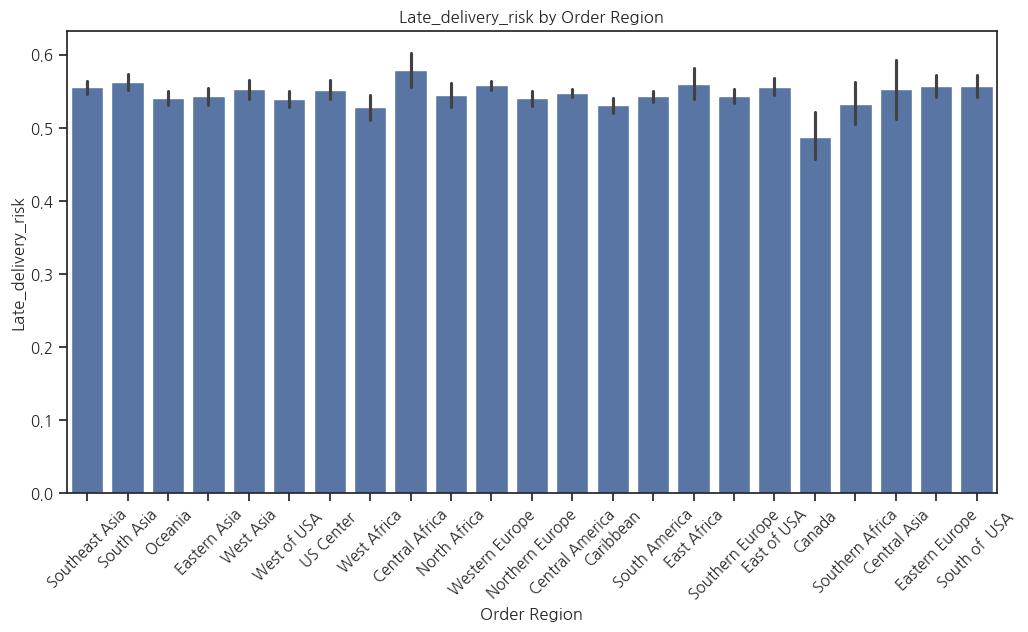

In [88]:
# 주문 지역별 배송 지연 비율(0에서 1)
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Region', y='Late_delivery_risk', data=data)
plt.title('Late_delivery_risk by Order Region')
plt.xticks(rotation=45)

plt.show()

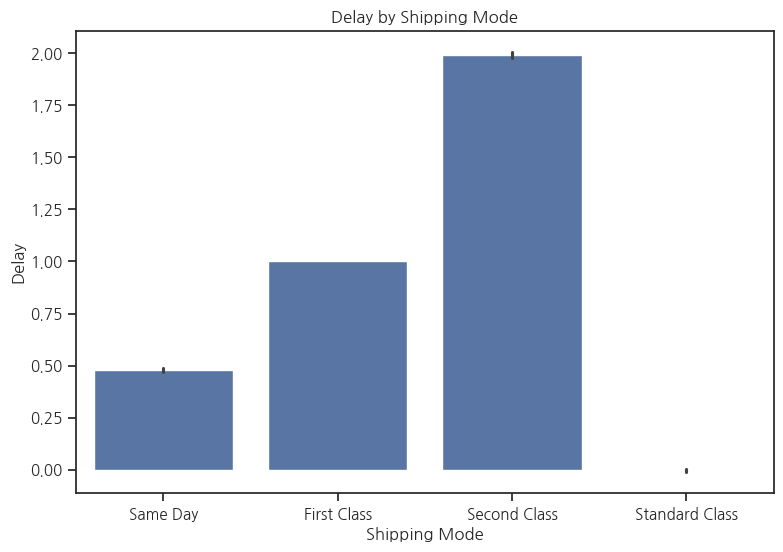

In [327]:
# 배송 유형별 배송 지연일 평균
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Delay', data=data, order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Delay by Shipping Mode')
plt.xticks(rotation=0)
plt.show()

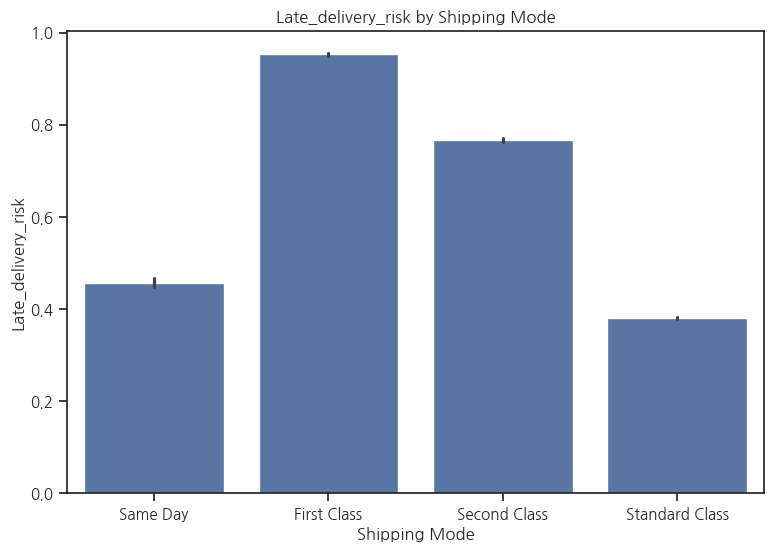

In [329]:
# 배송 유형별 배송 지연 비율(0에서 1)
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Late_delivery_risk', data=data, order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Late_delivery_risk by Shipping Mode')
plt.xticks(rotation=0)

plt.show()

1. 골프백, 카트의 지연 비율과 지연일 평균이 다소 높게 나타난 것으로 제외하면 눈에 띄는 결과는 없음
2. 미국에서 가까운 캐나다의 지연 비율과 지연일 평균이 다소 낮게 나타난 것을 제외하면 눈에 띄는 결과는 없음
3. 직관과는 반대로 배송 지연일 평균은 second class가, 배송 지연 비율은 first class가 가장 높음.
특히 first class는 거의 100%에 가까운 지연 비율을 보이고 있음.
-> 이를 설명할 수 있는 가설은?
-> 배송유형별 거리/예정시간의 차이가 배송 지연 분포에 영향을 줄 것으로 보임.
   즉, 배송이 오래 걸리거나 애로사항이 있는 경우에 높은 등급의 배송서비스를 이용하므로
   오히려 배송 지연의 정도가 높은 등급일 수록 크게 나타난다고 가정해볼 수 있음.
   이를 검증하기 위해서는 배송 유형별로 예정시간의 분포를 살펴봐야 함.

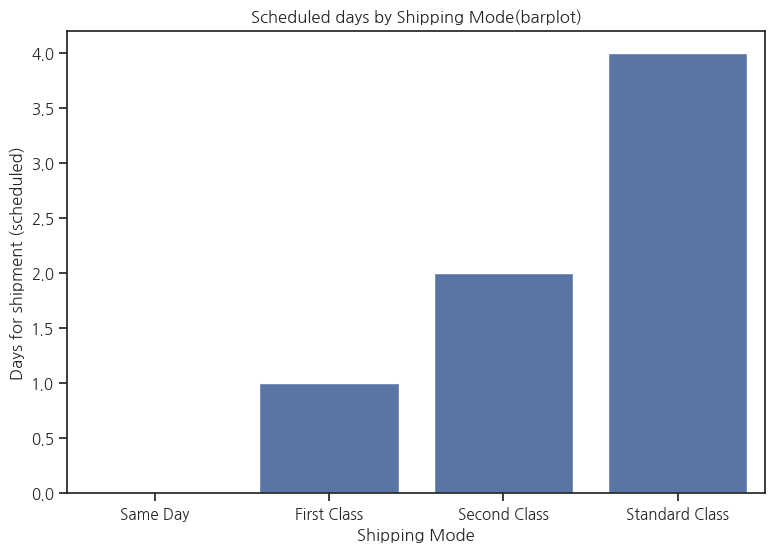

In [331]:
# 배송유형별 예정 배송기간 1
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Days for shipment (scheduled)', data=data, order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Scheduled days by Shipping Mode(barplot)')
plt.xticks(rotation=0)
plt.show()

<Figure size 900x600 with 0 Axes>

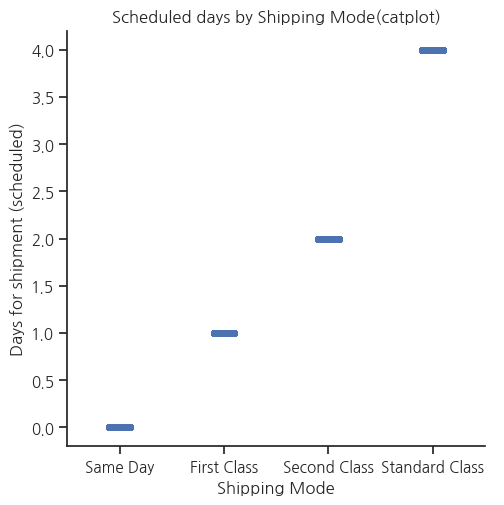

In [333]:
# 배송유형별 예정 배송기간 2
plt.figure(figsize=(9, 6))
sns.catplot(x='Shipping Mode', y='Days for shipment (scheduled)', data=data, order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Scheduled days by Shipping Mode(catplot)')
plt.xticks(rotation=0)
plt.show()

각 배송 유형의 등급별 예정 시간은 일률적으로 지정되어 있음을 확인함(First - 1일, Second - 2일, Standard - 4일)

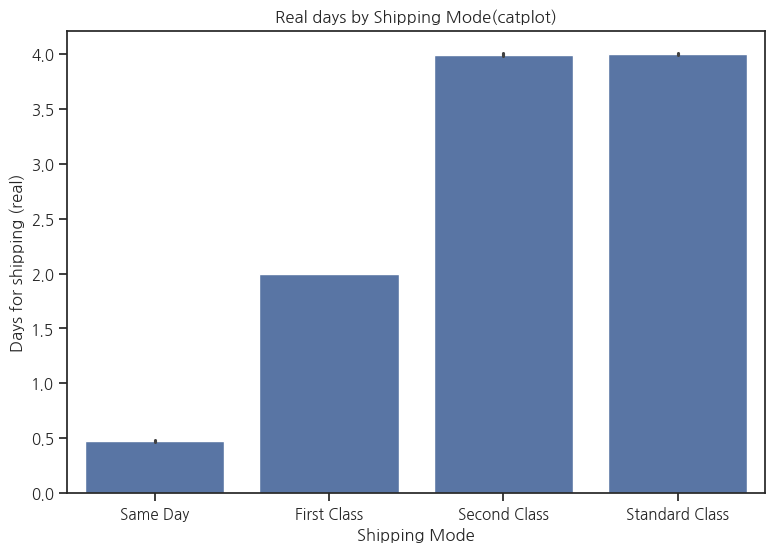

In [335]:
# 배송유형별 실제 배송소요기간 1
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Days for shipping (real)', data=data, order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Real days by Shipping Mode(catplot)')
plt.xticks(rotation=0)
plt.show()

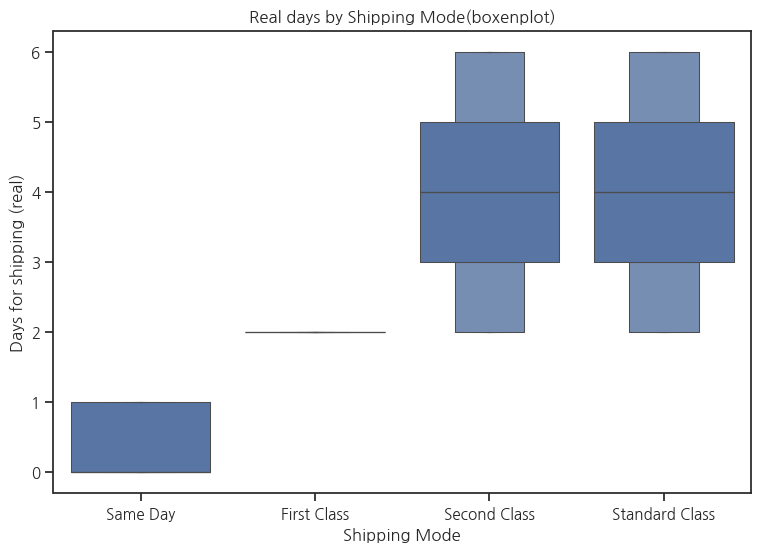

In [337]:
# 배송유형별 실제 배송소요기간 2
plt.figure(figsize=(9, 6))
sns.boxenplot(x='Shipping Mode', y='Days for shipping (real)', data=data, order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Real days by Shipping Mode(boxenplot)')
plt.xticks(rotation=0)
plt.show()

In [97]:
# 배송유형별 실제 배송소요기간 3
data.groupby(by='Shipping Mode')['Days for shipping (real)'].value_counts(sort=False, normalize=True)

Shipping Mode   Days for shipping (real)
First Class     2                           1.000000
Same Day        0                           0.521721
                1                           0.478279
Second Class    2                           0.202692
                3                           0.200619
                4                           0.198149
                5                           0.200250
                6                           0.198291
Standard Class  2                           0.201073
                3                           0.201388
                4                           0.199857
                5                           0.195922
                6                           0.201760
Name: proportion, dtype: float64

1. 예정 소요 시간에 비해 실제 소요 시간은 다양한 변수에 의해 달라지는 모습을 보였으나, 
    First Class는 일괄적으로 2일(예정 +1일)이 소요되고 있음
-> 지연 여부 기준으로는 First Class의 배송 성과가 매우 좋지 않음
   (다만 예외없이 2일 소요라는 점에서 최초 집계방식에서 일괄적으로 하루가 추가되었을 가능성도 있음)
3. 또한 Second Class는 다른 배송 유형에 비해 실제 소요 기간의 분포가 비교적 분산된 모습을 보이고 있으며,
   Standard Class와 큰 차이가 없는 모습을 보임
-> 즉, 소요기간 기준으로는 Second Class의 배송 성과가 상대적으로 좋지 않음
-> 처음부터 배송거리에 의해 Class가 분류되어 있거나, Class 분류에 수정이 필요할 수 있음(Second Class와 Standard Class의 병합 등)
-> Class 분류 기준을 식별하기 위해 배송 출발지와 목적지의 위경도를 구하고 여기서 거리를 계산하겠음
-> 출발지는 이미 위경도 데이터가 있으나 도착지 주소의 경우 도시가 가장 하위 클래스이므로 
도시를 기준으로 위경도를 선정하여 대략적인 직선거리를 구하도록 하겠음

In [99]:
# 목적지 주소를 구하기 위해 Order Country와 Order State, Order City를 합쳐 'Order Address' 컬럼 추가
data['Order Address'] = data['Order City'] + ', ' + data['Order State'] + ', ' + data['Order Country'] 
data['Order Address'].head()

0    Bekasi, Java Occidental, Indonesia
1              Bikaner, Rajastán, India
2              Bikaner, Rajastán, India
3     Townsville, Queensland, Australia
4     Townsville, Queensland, Australia
Name: Order Address, dtype: object

In [100]:
# 배송 목적지 주소(도시까지)를 뜻하는 'Order Address' 컬럼 값을 토대로 목적지의 위도 및 경도를 산출
# 소요시간이 너무 길어 Open Street map 대신 Google map API를 활용하겠음
'''
geoloc = Nominatim(user_agent = 'Shim', timeout=None)

for i in data.index[:]:
    add = data.loc[i, 'Order Address']
    geo = geoloc.geocode(add)
  # geo가 None인지 확인하여 None일 경우 기본값을 설정
    if geo is not None:
        data.loc[i, 'Order latitude'] = str(geo.latitude)  # 위도 저장
        data.loc[i, 'Order longitude'] = str(geo.longitude)  # 경도 저장
    else:
        data.loc[i, 'Order latitude'] = None  # 위도가 없을 경우 None 저장
        data.loc[i, 'Order longitude'] = None  # 경도가 없을 경우 None 저장

data.head()
'''

"\ngeoloc = Nominatim(user_agent = 'Shim', timeout=None)\n\nfor i in data.index[:]:\n    add = data.loc[i, 'Order Address']\n    geo = geoloc.geocode(add)\n  # geo가 None인지 확인하여 None일 경우 기본값을 설정\n    if geo is not None:\n        data.loc[i, 'Order latitude'] = str(geo.latitude)  # 위도 저장\n        data.loc[i, 'Order longitude'] = str(geo.longitude)  # 경도 저장\n    else:\n        data.loc[i, 'Order latitude'] = None  # 위도가 없을 경우 None 저장\n        data.loc[i, 'Order longitude'] = None  # 경도가 없을 경우 None 저장\n\ndata.head()\n"

In [101]:
# Google map geocoding API를 활용하여 목적지 위경도 가져오기
# 이미 작업을 완료했으므로 여기서는 주석처리

# API 키를 환경 변수로부터 가져오기
'''
gmaps = googlemaps.Client(key='USER_API_KEY') # 'USER_API_KEY'에 사용자 API 키 입력

for i in data.index:
    add = data.loc[i, 'Order Address']
    
    try:
        geo = gmaps.geocode(add)
        # geo가 None이거나 빈 리스트일 경우 기본값을 설정
        if geo and len(geo) > 0:
            data.loc[i, 'Order latitude'] = str(geo[0]['geometry']['location']['lat'])  # 위도 저장
            data.loc[i, 'Order longitude'] = str(geo[0]['geometry']['location']['lng'])  # 경도 저장
        else:
            data.loc[i, 'Order latitude'] = None  # 위도가 없을 경우 None 저장
            data.loc[i, 'Order longitude'] = None  # 경도가 없을 경우 None 저장
    except Exception as e:
        print(f"Error geocoding address {add}: {e}")
        data.loc[i, 'Order latitude'] = None  # 지오코딩 실패 시 None 저장
        data.loc[i, 'Order longitude'] = None  # 지오코딩 실패 시 None 저장

data.head()
'''

Error geocoding address Siauliai, iauliai, Lituania: HTTP Error: 400
Error geocoding address Siauliai, iauliai, Lituania: HTTP Error: 400
Error geocoding address Siauliai, iauliai, Lituania: HTTP Error: 400
Error geocoding address Zilina, ilina, Eslovaquia: HTTP Error: 400
Error geocoding address Siauliai, iauliai, Lituania: HTTP Error: 400
Error geocoding address Siauliai, iauliai, Lituania: HTTP Error: 400
Error geocoding address Siauliai, iauliai, Lituania: HTTP Error: 400
Error geocoding address Zilina, ilina, Eslovaquia: HTTP Error: 400
Error geocoding address Coxs B?z?r, Chittagong, Bangladés: HTTP Error: 400
Error geocoding address Coxs B?z?r, Chittagong, Bangladés: HTTP Error: 400
Error geocoding address Coxs B?z?r, Chittagong, Bangladés: HTTP Error: 400
Error geocoding address Coxs B?z?r, Chittagong, Bangladés: HTTP Error: 400
Error geocoding address Coxs B?z?r, Chittagong, Bangladés: HTTP Error: 400
Error geocoding address Zilina, ilina, Eslovaquia: HTTP Error: 

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Category Name,Delay,Order Address,Order latitude,Order longitude
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,Music and Media,-1,"Bekasi, Java Occidental, Indonesia",-6.2382699,106.9755726
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,Music and Media,1,"Bikaner, Rajastán, India",28.0229348,73.3119159
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,Music and Media,0,"Bikaner, Rajastán, India",28.0229348,73.3119159
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,Music and Media,-1,"Townsville, Queensland, Australia",-19.2589635,146.8169483
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,Music and Media,-2,"Townsville, Queensland, Australia",-19.2589635,146.8169483


In [177]:
# error로 위도 불러오지 못한 행만 확인
lat_error_mask = data['Order latitude'].isnull()
data[lat_error_mask]['Order Address'].value_counts()

Order Address
Gy?r, Gy?r, HungrÃ­a                    25
Siauliai, Âiauliai, Lituania            8
CoxÂs B?z?r, Chittagong, BangladÃ©s     7
Zilina, Âilina, Eslovaquia              5
Name: count, dtype: int64

In [179]:
# error로 경도 불러오지 못한 행만 확인
lng_error_mask = data['Order longitude'].isnull()
data[lng_error_mask]['Order Address'].value_counts()

Order Address
Gy?r, Gy?r, HungrÃ­a                    25
Siauliai, Âiauliai, Lituania            8
CoxÂs B?z?r, Chittagong, BangladÃ©s     7
Zilina, Âilina, Eslovaquia              5
Name: count, dtype: int64

In [189]:
# encoding 문제로 인해 좌표를 불러오지 못한 주소만 수정
data['Order Address'] = data['Order Address'].replace(to_replace={"Gy?r, Gy?r, HungrÃ­a" : "Győr, Győr, Hungría", 
                                                                  "Siauliai, Âiauliai, Lituania" : "Siauliai, Siauliai, Lituania", 
                                                                  "CoxÂs B?z?r, Chittagong, BangladÃ©s" : "Cox's Bazar, Chittagong, Bangladés",
                                                                  "Zilina, Âilina, Eslovaquia" : "Zilina, Zilina, Eslovaquia"})

data[lat_error_mask]['Order Address']

2988            Siauliai, Siauliai, Lituania
14565           Siauliai, Siauliai, Lituania
27633           Siauliai, Siauliai, Lituania
34371             Zilina, Zilina, Eslovaquia
40727                    Győr, Győr, Hungría
50390           Siauliai, Siauliai, Lituania
50410           Siauliai, Siauliai, Lituania
67692                    Győr, Győr, Hungría
67758                    Győr, Győr, Hungría
73368                    Győr, Győr, Hungría
73369                    Győr, Győr, Hungría
74316           Siauliai, Siauliai, Lituania
74576             Zilina, Zilina, Eslovaquia
74814                    Győr, Győr, Hungría
80752     Cox's Bazar, Chittagong, Bangladés
96270                    Győr, Győr, Hungría
96792                    Győr, Győr, Hungría
98997                    Győr, Győr, Hungría
98998                    Győr, Győr, Hungría
110319    Cox's Bazar, Chittagong, Bangladés
110321    Cox's Bazar, Chittagong, Bangladés
111884                   Győr, Győr, Hungría
111885    

In [ ]:
# 해당 행만 다시 좌표 불러오기
'''
gmaps = googlemaps.Client(key='USER_API_KEY') # 'USER_API_KEY'에 사용자 API 키 입력

for i in data[lat_error_mask].index:
    add = data[lat_error_mask].loc[i, 'Order Address']
    
    try:
        geo = gmaps.geocode(add)
        # geo가 None이거나 빈 리스트일 경우 기본값을 설정
        if geo and len(geo) > 0:
            data[lat_error_mask].loc[i, 'Order latitude'] = str(geo[0]['geometry']['location']['lat'])  # 위도 저장
            data[lat_error_mask].loc[i, 'Order longitude'] = str(geo[0]['geometry']['location']['lng'])  # 경도 저장
        else:
            data[lat_error_mask].loc[i, 'Order latitude'] = None  # 위도가 없을 경우 None 저장
            data[lat_error_mask].loc[i, 'Order longitude'] = None  # 경도가 없을 경우 None 저장
    except Exception as e:
        print(f"Error geocoding address {add}: {e}")
        data[lat_error_mask].loc[i, 'Order latitude'] = None  # 지오코딩 실패 시 None 저장
        data[lat_error_mask].loc[i, 'Order longitude'] = None  # 지오코딩 실패 시 None 저장

data.head()
'''

In [233]:
# API 사용 한도 문제로 인해 해당 주소만 좌표 직접 입력
add_mask1 = data['Order Address'].isin(["Győr, Győr, Hungría"])
add_mask2 = data['Order Address'].isin(["Siauliai, Siauliai, Lituania"])
add_mask3 = data['Order Address'].isin(["Cox's Bazar, Chittagong, Bangladés"])
add_mask4 = data['Order Address'].isin(["Zilina, Zilina, Eslovaquia"])

data.loc[add_mask1, ['Order latitude', 'Order longitude']] = [47.687577, 17.650445]
data.loc[add_mask2, ['Order latitude', 'Order longitude']] = [55.934887, 23.313684] 
data.loc[add_mask3, ['Order latitude', 'Order longitude']] = [21.427216, 92.006108] 
data.loc[add_mask4, ['Order latitude', 'Order longitude']] = [49.218933, 18.740434] 

In [311]:
# 좌표 입력 결과 확인
data[add_mask4][['Order latitude', 'Order longitude']]

,Order latitude,Order longitude
34371,49.218933,18.740434
74576,49.218933,18.740434
147519,49.218933,18.740434
147520,49.218933,18.740434
177074,49.218933,18.740434


In [245]:
# 전체 주소에 더해 Order State와 Order City도 수정
data.loc[add_mask1, ['Order City', 'Order State']] = ["Győr", "Győr"]
data.loc[add_mask2, ['Order City', 'Order State']] = ["Siauliai", "Siauliai"] 
data.loc[add_mask3, ['Order City', 'Order State']] = ["Cox's Bazar", "Cox's Bazar"] 
data.loc[add_mask4, ['Order City', 'Order State']] = ["Zilina", "Zilina"]

In [713]:
# 목적지 위도 및 경도 데이터 타입 float로 수정
data['Order latitude'].astype('float')
data['Order longitude'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer Id                    180519 non-null  int64  
 11  Customer Segment               180519 non-null  object 
 12  Customer State                

In [743]:
# geopy 라이브러리의 distance 모듈을 이용해 출발지와 목적지 간의 거리(geodesic)를 산출하고 저장
# 이후 folium의 PolyLine 메소르를 활용할 때 위치 정보를 list로 넣어야 하므로 list()로 변환

# 출발지 위도, 경도 합치기
data['Customer coord'] = pd.Series(list(zip(data['Latitude'], data['Longitude']))) 

# 도착지 위도, 경도 합치기
data['Order coord'] = pd.Series(list(zip(data['Order latitude'], data['Order longitude'])))

# 합친 위경도 좌표를 활용해 거리 산출
data['Distance'] = data.apply(lambda x: distance.distance(x['Customer coord'], x['Order coord']).km, axis=1)

data['Distance'].head()

0    18481.254388
1    13277.584824
2    12603.023840
3    11625.940834
4    16572.819271
Name: Distance, dtype: float64

In [998]:
# 결과 백업
# data.to_csv('backup/DataCoSupplyChainDataset_rev1.csv', encoding='unicode_escape', sep=',', index=None)

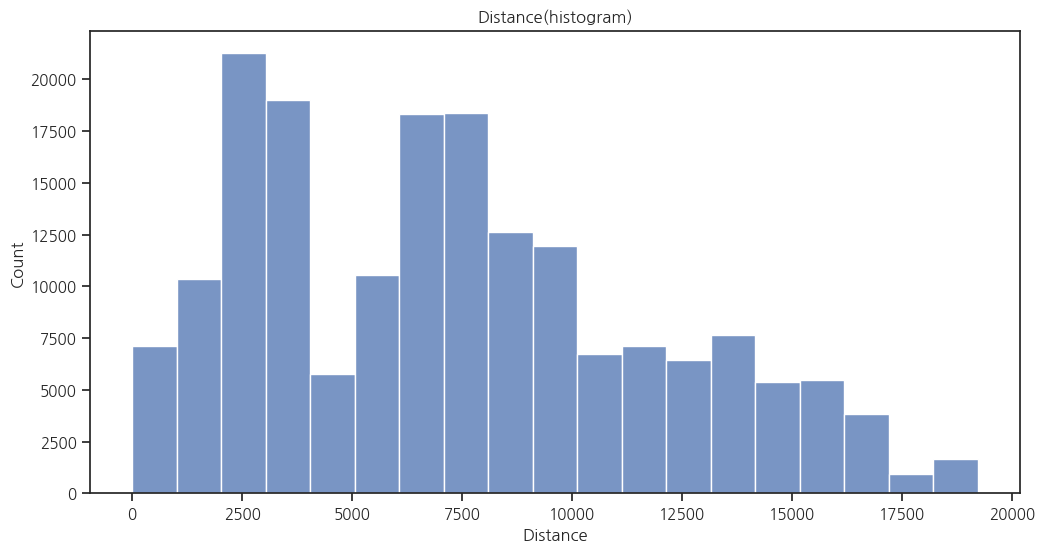

In [293]:
# 배송거리의 분포를 히스토그램으로 확인
plt.figure(figsize=(12, 6))
sns.histplot(x='Distance', data=data, binwidth=1000)
plt.title('Distance(histogram)')
plt.xticks(rotation=0)
plt.show()

C:\Users\SSW\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.



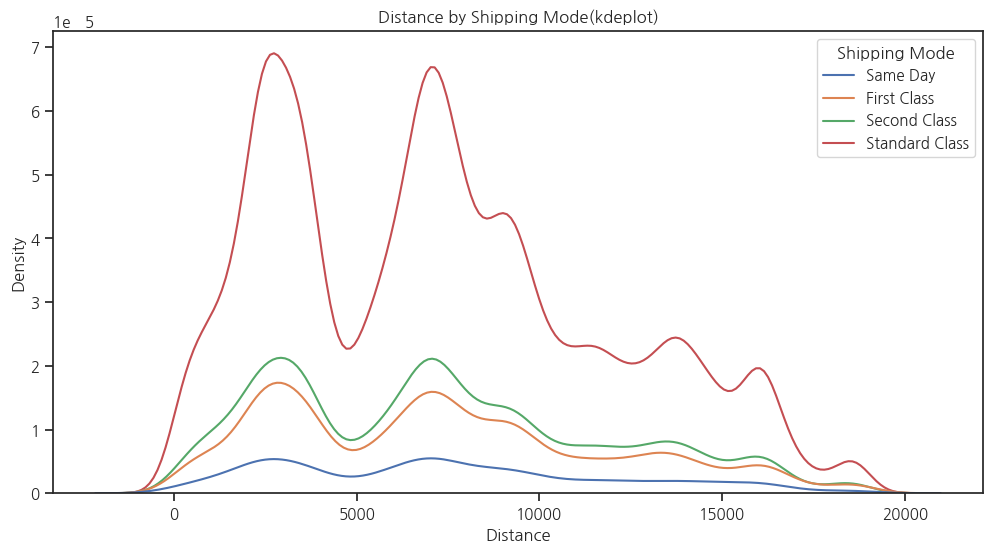

In [348]:
# 배송 유형별로 배송거리 분포를 kde플롯으로 확인 1 (common_norm=True)
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Distance', data=data, hue='Shipping Mode', hue_order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Distance by Shipping Mode(kdeplot)')
plt.xticks(rotation=0)
plt.show()

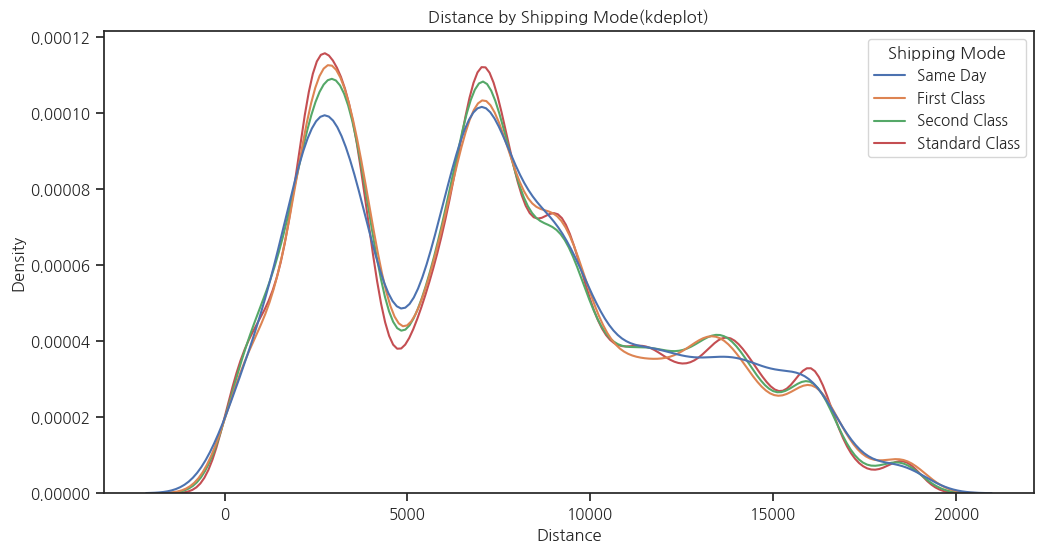

In [350]:
# 배송 유형별로 배송거리 분포를 kde플롯으로 확인 2 (common_norm=False)
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Distance', data=data, common_norm=False, hue='Shipping Mode', hue_order=["Same Day", "First Class", "Second Class", "Standard Class"])
plt.title('Distance by Shipping Mode(kdeplot)')
plt.xticks(rotation=0)
plt.show()

배송유형 별로 배송거리 분포를 살펴봤을 때,    
약 2500km와 약 7500km 지점에 비교적 집중되어 있는 쌍봉형의 분포가 모든 배송유형에서 공통적으로 나타나고 있음.    
-> 즉, 배송유형 구분과 배송거리 간에는 어떤 연관성을 찾기 어려움    
-> 이는 곧 First Class나 Second Class의 상대적으로 저조한 배송성과가 결코 의도된 것이 아니며 개선이 필요한 사항이라는 점을 시사함.

In [ ]:
# 산출한 좌표로 folium 활용한 배송 패턴 시각화
# 용량 문제로 output은 제거
m = folium.Map(location=None, tiles="OpenStreetMap", zoom_start=10)

for i in data.index[:]: 
    line_coords = [data.iloc[i]['Customer coord'], data.iloc[i]['Order coord']]
    folium.PolyLine(
    locations=line_coords, # 선의 위경도 좌표
    color='orange',  # 선 색상
    weight=0.003,  # 선 굵기
    opacity=0.7,  # 선 투명도
    ).add_to(m)

m

In [ ]:
# 정보량이 너무 많아 출발지별로 나눠 살펴보겠음
# 미국이 출발지인 경우 파란색 연결선으로, 푸에르토리코가 출발지인 경우 주황색 연결선으로 표현
# 용량 문제로 output은 제거
US_mask = data['Customer Country'] == 'EE. UU.'
US_data = data[US_mask]

m1 = folium.Map(location=None, tiles="OpenStreetMap", zoom_start=10)

for i in US_data.index[:]: 
    line_coords = [US_data.loc[i]['Customer coord'], US_data.loc[i]['Order coord']]
    folium.PolyLine(
    locations=line_coords, # 선의 위경도 좌표
    color='blue',  # 선 색상
    weight=0.002,  # 선 굵기
    opacity=0.7,  # 선 투명도
    ).add_to(m1)

m1

In [ ]:
# 용량 문제로 output은 제거
Puerto_mask = data['Customer Country'] == 'Puerto Rico'
Puerto_data = data[Puerto_mask]

m2 = folium.Map(location=None, tiles="OpenStreetMap", zoom_start=10)

for i in Puerto_data.index[:]: 
    line_coords = [Puerto_data.loc[i]['Customer coord'], Puerto_data.loc[i]['Order coord']]
    folium.PolyLine(
    locations=line_coords, # 선의 위경도 좌표
    color='orange',  # 선 색상
    weight=0.005,  # 선 굵기
    opacity=0.7,  # 선 투명도
    ).add_to(m2)

m2

위는 배송 패턴을 출발지-목적지 간 연결선으로 시각화한 결과임 
1. 미국에서 출발하는 판매 건의 경우 미국 서부(캘리포니아 등)에서 가장 많이 출발하여 중남미, 서부/북부 유럽과 남부 아시아, 호주 등의 지역으로 많이 배송됨    
2. 푸에르토리코에서 출발하는 판매 건의 경우에도 배송 목적지 면에서 유사한 배송 패턴을 보이고 있음

In [ ]:
# 배송 유형별로 배송 패턴 시각화 1
# Same Day
# 용량 문제로 output은 제거
Same_mask = data['Shipping Mode'] == 'Same Day'
Same_data = data[Same_mask]

m3 = folium.Map(location=None, tiles="OpenStreetMap", zoom_start=10)

for i in Same_data.index[:]: 
    line_coords = [Same_data.loc[i]['Customer coord'], Same_data.loc[i]['Order coord']]
    folium.PolyLine(
    locations=line_coords, # 선의 위경도 좌표
    color='yellow',  # 선 색상
    weight=0.03,  # 선 굵기
    opacity=0.7,  # 선 투명도
    ).add_to(m3)

m3

In [ ]:
# 배송 유형별로 배송 패턴 시각화 2
# First Class
# 용량 문제로 output은 제거
First_mask = data['Shipping Mode'] == 'First Class'
First_data = data[First_mask]

m4 = folium.Map(location=None, tiles="OpenStreetMap", zoom_start=10)

for i in First_data.index[:]: 
    line_coords = [First_data.loc[i]['Customer coord'], First_data.loc[i]['Order coord']]
    folium.PolyLine(
    locations=line_coords, # 선의 위경도 좌표
    color='#4fff33',  # 선 색상
    weight=0.007,  # 선 굵기
    opacity=0.6,  # 선 투명도
    ).add_to(m4)

m4

In [ ]:
# 배송 유형별로 배송 패턴 시각화 3
# Second Class
# 용량 문제로 output은 제거
Second_mask = data['Shipping Mode'] == 'Second Class'
Second_data = data[Second_mask]

m5 = folium.Map(location=None, tiles="OpenStreetMap", zoom_start=10)

for i in Second_data.index[:]: 
    line_coords = [Second_data.loc[i]['Customer coord'], Second_data.loc[i]['Order coord']]
    folium.PolyLine(
    locations=line_coords, # 선의 위경도 좌표
    color='violet',  # 선 색상
    weight=0.008,  # 선 굵기
    opacity=0.7,  # 선 투명도
    ).add_to(m5)

m5

In [ ]:
# 배송 유형별로 배송 패턴 시각화 4
# Standard Class
# 용량 문제로 output은 제거
Standard_mask = data['Shipping Mode'] == 'Standard Class'
Standard_data = data[Standard_mask]

m6 = folium.Map(location=None, tiles="OpenStreetMap", zoom_start=10)

for i in Standard_data.index[:]: 
    line_coords = [Standard_data.loc[i]['Customer coord'], Standard_data.loc[i]['Order coord']]
    folium.PolyLine(
    locations=line_coords, # 선의 위경도 좌표
    color='#6495ED',  # 선 색상
    weight=0.003,  # 선 굵기
    opacity=0.6,  # 선 투명도
    ).add_to(m6)

m6

(위와 같은 시각화 방식이 생각보다 가시성이 떨어지는 듯함.    
다음에는 모든 좌표값을 맵핑하지 말고, 국가별이나 지역별 등으로 묶어서 맵핑하고 연결선에 가중치를 주는 방식으로 시각화해야 할 것 같음)